## Flight price

In [3]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("flight_price.xlsx")

In [5]:
df.shape

(10683, 11)

In [6]:
#Q2
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
prices = df['Price']

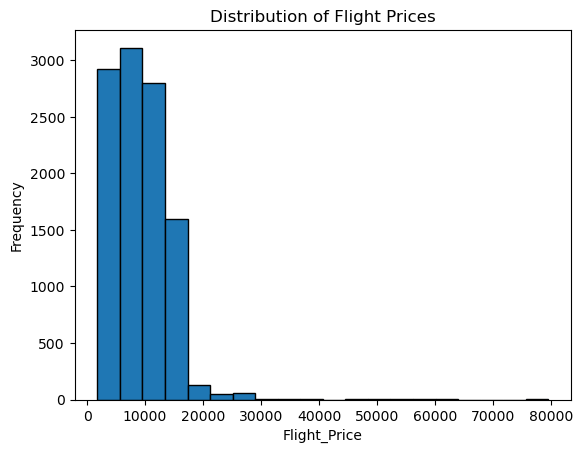

In [8]:
plt.hist(prices,bins = 20, edgecolor ='k')
plt.xlabel('Flight_Price')
plt.ylabel("Frequency")
plt.title("Distribution of Flight Prices")
plt.show()

In [9]:
## according to this histogram it shows positive skew distribution

In [10]:
df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [11]:
#Q3
min_price = min(prices)
max_price = max(prices)
price_range = max_price - min_price
print("Minimum Price", min_price)
print("Maximum Price", max_price)
print("Price Range", price_range)

Minimum Price 1759
Maximum Price 79512
Price Range 77753


In [12]:
#Q4
Airline = df.groupby("Airline")

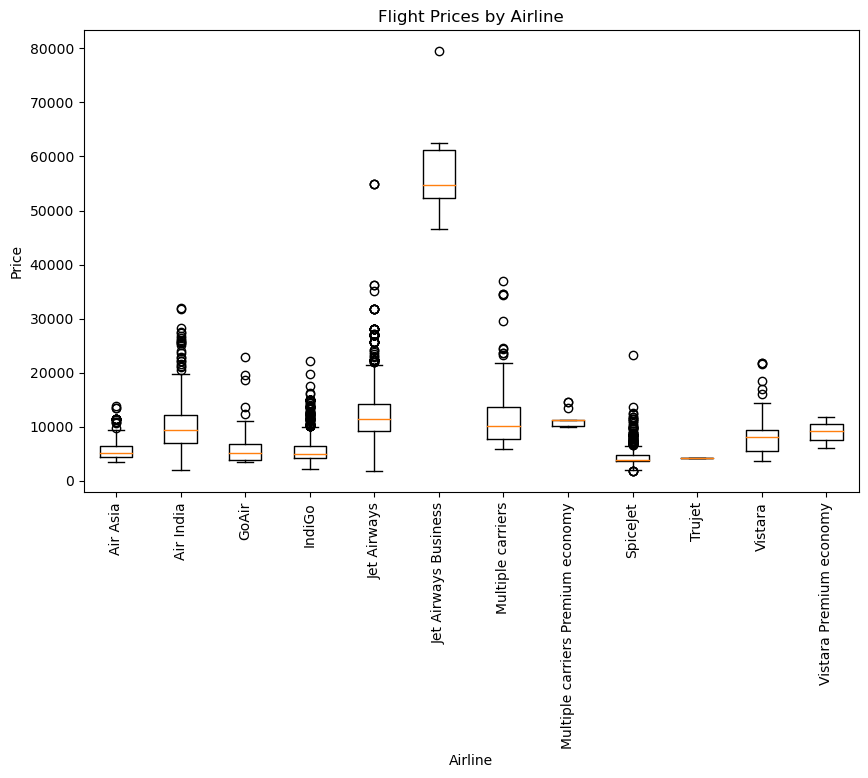

In [13]:
plt.figure(figsize = (10,6))
plt.boxplot([group['Price'] for name, group in Airline], labels= Airline.groups.keys())
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

##Q5

-Data points that are located above the upper whisker or below the lower whisker are considered potential outliers. These data points have prices significantly higher or lower than the bulk of the data for a specific airline.
-The presence of outliers can have a significant impact on your analysis. They can skew summary statistics and affect the interpretation of your data.


#Q6

To identify the peak travel season from the Flight Price dataset, you should focus on analyzing various features that can provide insights into when demand for flights is the highest. Here are some key features and steps you can use to identify the peak travel season and how to present your findings to your boss:

1. Departure Date:
   - Analyze the flight prices based on the departure date, including month, day of the week, and even specific holidays. Look for trends and patterns in pricing during different times of the year.

2. Booking Trends:
   - Examine the booking patterns over time. Determine when most flight bookings occur. High booking volumes may indicate peak travel seasons.

3. Seasonal Trends:
   - Consider the impact of seasons on flight prices. For example, summer and major holidays often lead to higher demand and prices.

4. Destination:
   - Analyze flight prices to specific destinations. Some destinations may have their own peak seasons due to events or weather conditions.

5. Historical Data:
   - Utilize historical flight price data, if available, to identify consistent trends year over year.

6. Special Events:
   - Check for any major events, conferences, or festivals that might influence travel patterns and flight prices.

7. Competitor Analysis:
   - Investigate the pricing strategies of competitors in the travel industry to understand how they adapt during peak seasons.

8. Demand vs. Supply:
   - Consider the relationship between demand and supply. High demand during specific times may lead to increased prices.

9. Visualizations:
   - Create visualizations such as line charts, bar graphs, or heatmaps to illustrate trends in flight prices and booking patterns. Visual representations make it easier to convey your findings.

10. Statistical Analysis:
   - Use statistical techniques to identify statistically significant differences in flight prices during various periods.

Presenting Your Findings to Your Boss:

When presenting your findings to your boss, you should provide a clear and concise summary of your analysis. Here's how you can structure your presentation:

1. Executive Summary:
   - Start with a brief executive summary that highlights the main findings.

2. Data Sources:
   - Mention the data sources and methodology used for the analysis.

3. Peak Season Identification:
   - Clearly state the identified peak travel season(s) based on your analysis.

4. Key Factors:
   - Explain the key features and factors that contribute to the peak season.

5. Visuals:
   - Use visual aids such as charts and graphs to support your findings and make the trends visually apparent.

6. Implications:
   - Discuss the implications of the identified peak season for the travel agency, such as pricing strategies, marketing efforts, and resource allocation.

7. Recommendations:
   - Provide recommendations for actions that the travel agency can take to leverage the peak season, such as offering promotions or expanding services.

8. Future Analysis:
   - Suggest any follow-up analyses or data collection that could further enhance the agency's understanding of travel trends.

By following these steps and presenting your findings clearly, you can help your boss make informed decisions and capitalize on the peak travel season.

In [14]:
#Q7

df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
df['Date']=pd.to_datetime(df["Date_of_Journey"])

/tmp/ipykernel_97/2159026437.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df["Date_of_Journey"])


In [16]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

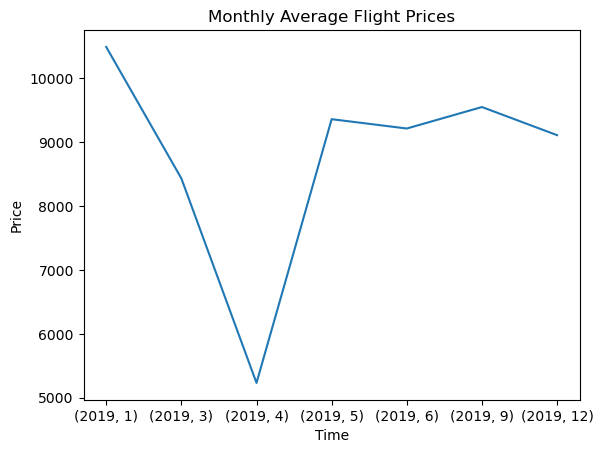

In [17]:
monthly_avg_prices = df.groupby(['Year', 'Month'])['Price'].mean()
monthly_avg_prices.plot(title = 'Monthly Average Flight Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

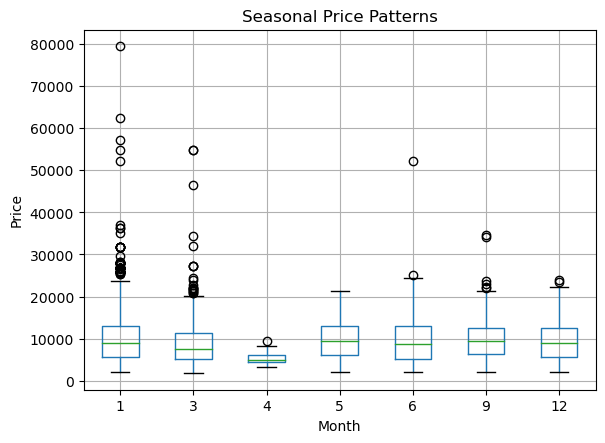

In [18]:
plt.figure(figsize=(10,6))
df.boxplot(column='Price', by = 'Month')
plt.suptitle('')
plt.title("Seasonal Price Patterns")
plt.xlabel('Month')
plt.ylabel("Price")
plt.show()

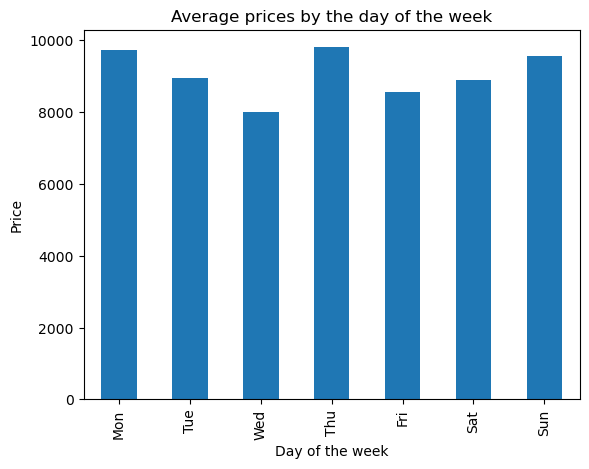

In [19]:
day_of_week_avg_prices = df.groupby(df['Date'].dt.dayofweek)['Price'].mean()
day_of_week_avg_prices.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_avg_prices.plot(kind = 'bar', title = "Average prices by the day of the week")
plt.xlabel('Day of the week')
plt.ylabel('Price')
plt.show()

 We load the dataset and convert the date column to a datetime object for time-based analysis.
We extract the year and month from the date for monthly trends.
We create visualizations to show trends in flight prices over time, seasonal patterns, and price variations by the day of the week.
i guess this would be enough to analyse the data

#Q8

As a data scientist working for an airline company, you can identify the factors that affect flight prices by conducting a thorough analysis of the Flight Price dataset. Here are the key features to analyze and a suggested approach for presenting your findings to the management team:

Features to Analyze:

1. **Route or Destination:** Examine how flight prices vary by specific routes or destinations. Some routes may be more popular and therefore have higher prices.

2. **Time and Season:** Analyze the impact of time and season on flight prices. This includes day of the week, month, and any seasonality effects such as holidays or special events.

3. **Booking Lead Time:** Investigate how the time gap between booking and departure affects prices. Last-minute bookings may have different pricing patterns.

4. **Flight Class:** Compare prices across different classes (economy, business, first class) to see if there are significant variations.

5. **Airlines:** Analyze the pricing strategies of different airlines in the dataset. Some airlines may consistently offer lower or higher prices.

6. **Airport and Airport Fees:** Look at the influence of departure and arrival airports on prices. Airport fees and taxes can impact pricing.

7. **Flight Duration:** Study the correlation between flight duration and prices. Longer flights may be more expensive.

8. **Competition:** Assess how competition from other airlines on the same route affects prices.

9. **Economic Factors:** Consider economic factors like fuel prices, inflation, and currency exchange rates, as these can impact flight prices.

Approach to Present Findings:

1. **Data Visualization:** Use various data visualizations, such as line charts, scatter plots, and box plots, to illustrate the relationships between different factors and flight prices.

2. **Regression Analysis:** Conduct regression analysis to quantify the impact of each factor on flight prices. This can provide insight into the strength and direction of relationships.

3. **Hypothesis Testing:** Use statistical hypothesis tests to determine if certain factors are statistically significant in influencing prices.

4. **Segmentation:** Segment the dataset to analyze specific routes, airlines, or classes separately. This can reveal more granular insights.

5. **Predictive Models:** Build predictive models to forecast flight prices based on the identified factors. This can help in pricing strategies and revenue optimization.

6. **Report and Presentation:** Prepare a comprehensive report that summarizes your findings. Include clear visualizations, tables, and statistical results. Explain the impact of each factor on flight prices and provide actionable recommendations.

7. **Actionable Insights:** Present your findings to the management team in a clear and concise manner. Discuss the factors that have the most significant impact on flight prices and how the company can use this information to optimize pricing, marketing, and other strategies.

By analyzing these factors and presenting your findings effectively, you can provide valuable insights to the airline company's management team to make data-driven decisions and enhance pricing strategies.

## Google Playstore

In [20]:
df1 = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [21]:
#Q9
df1.shape

(10841, 13)

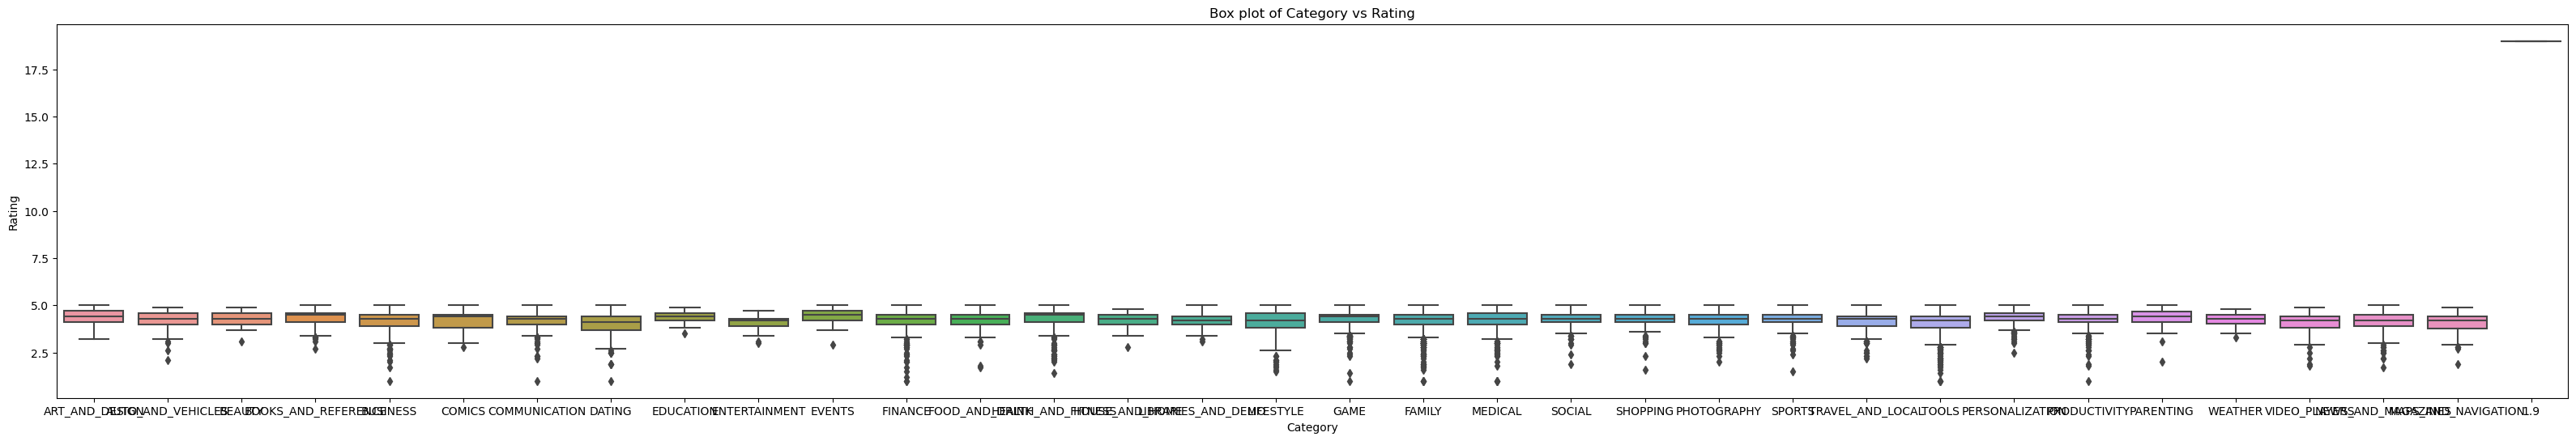

In [22]:
#Q10
plt.figure(figsize=(40,6))
sns.boxplot(x = 'Category', y = 'Rating', data = df1)
plt.title('Box plot of Category vs Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [23]:
#Q11
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## rating has 1474 null values which can make our assumption biased so it is impoertant to deal with missing values by its mean, median, mode and there are many other options.

In [24]:
#Q12
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [26]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [27]:
df1['Size']= df1['Size'].str.replace('M','000')
df1["Size"] = df1["Size"].str.replace('k',' ')
df1['Size'] = df1['Size'].replace('1,000 ', np.nan)
df1['Size'] = df1['Size'].replace("Varies with device",np.nan)

In [28]:
df1['Size'] = df1['Size'].astype(float)

ValueError: could not convert string to float: '1,000+'

In [ ]:
df1.info()

In [ ]:
Size = df1['Size']
Rating = df1['Rating']
plt.figure(figsize=(10,6))
plt.scatter(Size, Rating, c = 'b', marker = 'o', label='Size Vs Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Scatter plot for the relationship betweem size and rating')

In [29]:
#Q13
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [30]:
df1['Price'] = df1['Price'].str.replace('$', ' ')
df1['Price'] = df1['Price'].replace('Everyone', np.nan)

/tmp/ipykernel_97/2069970592.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$', ' ')


In [31]:
df1['Price'] = df1['Price'].astype(float)

In [32]:
df1['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [33]:
df1['Type'] = df1['Type'].replace('Free', 1)
df1['Type'] = df1['Type'].replace('Paid', 2)
df1['Type'] = df1['Type'].replace('nan', 3)
df1['Type'] = df1['Type'].replace('0', 4)


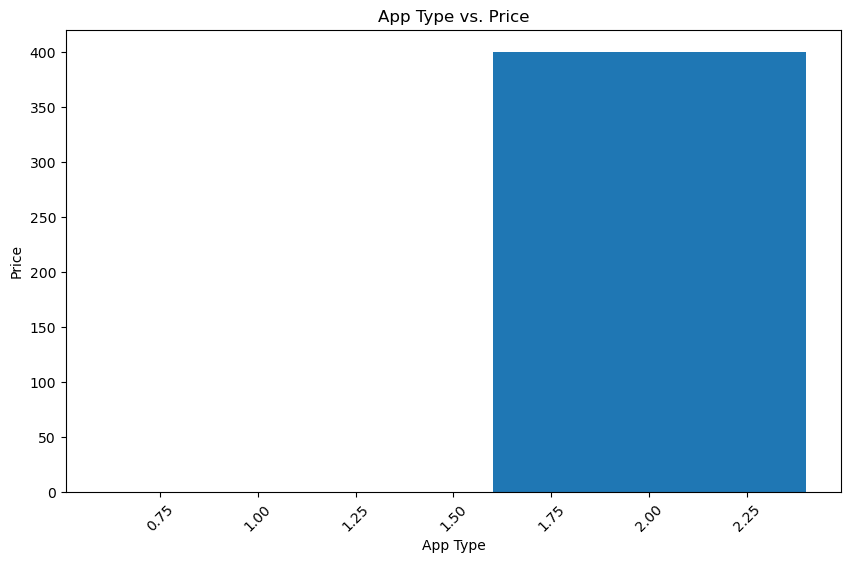

In [36]:
plt.figure(figsize=(10,6))
plt.bar(df1['Type'], df1['Price'])
plt.xlabel('App Type')
plt.ylabel('Price')
plt.title('App Type vs. Price')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Q14
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [46]:
df1['Installs'] = df1['Installs'].str.replace(',', '', regex=True)
df1['Installs'] = df1['Installs'].str.replace('[^0-9]', '', regex=True)

In [56]:
df1['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

In [58]:
df1['Installs'] = df1['Installs'].replace('nan', '0')

In [60]:
df1['Installs'] = df1['Installs'].astype(float)

In [63]:
sorted_df1 = df1.sort_values(by='Installs', ascending = False)
top_10_apps= sorted_df1.head(10)
frequency_table = top_10_apps[['App', 'Installs']]
print(frequency_table)

                                           App      Installs
3896                            Subway Surfers  1.000000e+09
3943                                  Facebook  1.000000e+09
335   Messenger – Text and Video Chat for Free  1.000000e+09
3523                              Google Drive  1.000000e+09
3565                              Google Drive  1.000000e+09
2884                             Google Photos  1.000000e+09
3665                                   YouTube  1.000000e+09
2853                             Google Photos  1.000000e+09
4234             Skype - free IM & video calls  1.000000e+09
3687                   Google Play Movies & TV  1.000000e+09


#Q15

Analyzing the Google Play Store dataset to identify the most popular app categories is a valuable step when planning to launch a new app. Here's a systematic approach to this task and the features you should consider:

**Approach:**

1. **Data Acquisition:** Obtain the Google Play Store dataset. You can find such datasets on platforms like Kaggle or directly from Google if available. Ensure that it includes relevant information about apps and their categories.

2. **Data Exploration and Cleaning:**
   - Load the dataset into a data analysis tool, such as Python with pandas.
   - Explore the dataset to understand its structure and content.
   - Clean the data by handling missing values, removing duplicates, and correcting any inconsistencies in the data.

3. **Data Analysis:**
   - To identify the most popular app categories, consider the following features and analyses:

   - **Category:** Examine the distribution of apps across different categories. Calculate the frequency of each category to determine which categories have the most apps.

   - **Number of Installs:** Analyze the number of installs or downloads for each app in each category. You can calculate statistics such as the mean, median, and total installs for each category to identify the most popular ones.

   - **User Ratings:** Consider the average user ratings and user reviews for apps in each category. This can help determine user satisfaction and engagement.

   - **Price:** Investigate whether free or paid apps are more popular in each category. You might find that certain categories are more receptive to paid apps, while others rely on a freemium model.

   - **App Size:** Analyze the app size in each category, as smaller app sizes might be more appealing to users, especially those with limited storage space.

4. **Visualization:** Create visualizations such as bar charts, histograms, or box plots to represent your findings. Visualizations can provide a clear and intuitive way to present the popularity of app categories.

5. **Recommendations:**
   - Based on your analysis, identify the app categories with the highest number of downloads, user ratings, or other relevant popularity metrics.
   - Provide recommendations to the company regarding which app categories are the most popular and may be more likely to succeed in the market.

6. **Further Analysis:** To refine your recommendations, you can conduct more advanced analyses, such as regression analysis to understand the relationship between variables, sentiment analysis on user reviews, or time series analysis to see trends over time.

Remember that user preferences and market dynamics can change over time, so it's essential to periodically update your analysis to stay up-to-date with current trends in the app market.

#Q16

To identify the most successful app developers in the Google Play Store dataset, you can analyze various features and use data visualizations to present your findings effectively. Here's an approach to this task:

**Features to Analyze:**

1. **Number of Apps:** Start by analyzing the number of apps each developer has in the dataset. More apps might indicate a prolific developer.

2. **Number of Installs:** Consider the total number of installs across all apps by each developer. This metric reflects the popularity of an app developer.

3. **Average User Ratings:** Analyze the average user ratings for apps by each developer. Higher average ratings indicate user satisfaction.

4. **Total User Reviews:** Consider the total number of user reviews received by all apps from a developer. This reflects user engagement.

5. **App Categories:** Determine the categories in which the developer specializes. This can help you understand their niche and strengths.

**Data Visualizations:**

1. **Bar Charts:** Use bar charts to display the number of apps by each developer, making it easy to see which developers have the most apps in the store.

2. **Scatter Plots:** Create a scatter plot with the number of installs on the x-axis and the average user ratings on the y-axis. Each point represents a developer, and the position of the point reflects both popularity (installs) and user satisfaction (ratings).

3. **Pie Charts:** Display the distribution of developers across app categories using pie charts. This helps identify each developer's specialization.

4. **Heatmaps:** Create a heatmap that shows the correlation between the number of installs, average user ratings, and the total number of user reviews. Heatmaps can help you identify developers with a high combination of these metrics.

5. **Stacked Bar Charts:** Use stacked bar charts to show the breakdown of installs and user ratings within each developer's portfolio. This helps visualize the distribution of success among their apps.

6. **Word Clouds:** Analyze the keywords and app names associated with the developer's apps and present them in a word cloud. This can provide insights into the developer's branding and app naming strategies.

7. **Time Series Plots:** If you have data over time, create time series plots to track the developer's performance over different time periods.

8. **Box Plots:** Use box plots to visualize the distribution of user ratings within a developer's apps, allowing you to identify outliers and see if they consistently produce high-rated apps.

9. **Network Diagrams:** Consider creating network diagrams to visualize relationships between developers and their apps, especially if a developer owns multiple apps or has collaborations with others.

After conducting the analysis and creating visualizations, you can present your findings to the app development company, highlighting the most successful app developers based on the chosen metrics and providing recommendations. Additionally, you can use statistical tests to determine if the observed differences between developers are statistically significant.

#Q17

To determine the best time to launch a new app in the Google Play Store, a marketing research firm can analyze various features and use data visualizations to make informed recommendations. Here's an approach to this task:

**Features to Analyze:**

1. **App Release Dates:** Analyze the historical data to identify trends and patterns related to app release dates. You can use the app's "Last Updated" date as a proxy for the release date.

2. **App Categories:** Consider which app categories tend to perform well during specific time periods. Different categories may have different seasonality.

3. **Number of Installs:** Examine the number of installs of apps released at different times. This can help identify when users are more active and likely to download new apps.

4. **User Ratings and Reviews:** Analyze the user ratings and reviews of apps based on their release dates. This can indicate how well apps are received shortly after launch.

5. **Competition:** Evaluate the competition during specific time frames. High competition might make it challenging to stand out, while low competition could be an opportunity.

**Data Visualizations:**

1. **Time Series Plots:** Use time series plots to visualize the number of app releases over time. This can help identify trends and seasonality in app releases.

2. **Bar Charts:** Create bar charts to show the distribution of app releases by month or quarter. This can reveal the months with the highest and lowest app launches.

3. **Line Charts:** Display a line chart showing the average user ratings of apps over time to see if there are any noticeable trends or fluctuations.

4. **Heatmaps:** Use heatmaps to visualize the correlation between app release dates and the number of installs. This can help identify the best times for app launches based on user engagement.

5. **Box Plots:** Create box plots to compare user ratings and reviews of apps released in different months or quarters. This can help identify when apps tend to receive better feedback.

6. **Stacked Area Charts:** Show the cumulative number of app installs by month or quarter using stacked area charts. This can provide insights into the growth of app installations over time.

7. **Histograms:** Use histograms to display the distribution of app installs, user ratings, or reviews. This can help identify the typical ranges of these metrics.

8. **Scatter Plots:** Plot the release date of apps against the number of installs or user ratings. Scatter plots can help identify any patterns or outliers.

9. **Pie Charts:** Show the distribution of app categories by month or quarter. This can help identify which categories tend to perform well during specific time periods.

10. **Regression Analysis:** Perform regression analysis to model the relationship between app release dates and the number of installs, user ratings, or reviews. This can provide more quantitative insights.

By analyzing these features and using the suggested data visualizations, the marketing research firm can identify the best time to launch a new app based on historical trends and user behavior in the Google Play Store. They can then make informed recommendations to the company on when to schedule the app launch for the greatest chances of success.